In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("diabetes-pima-indian.csv")

In [13]:
df.head()
#the outcome is our target, 1/0 has or has not got diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


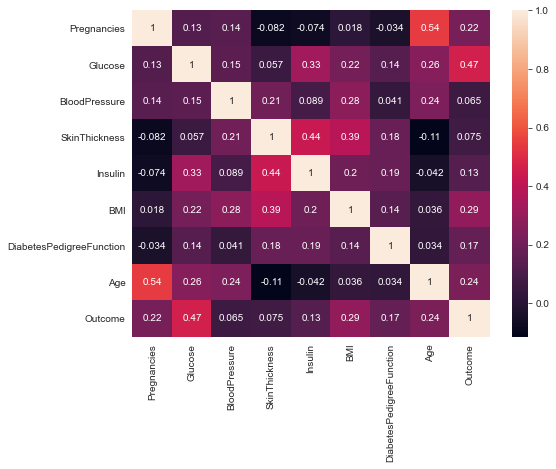

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
#not much correlation between the statistics as is
#three areas with slight correlation:
#Age+Pregnancies, Glucose+Outcome, Insulin+SkinThickness

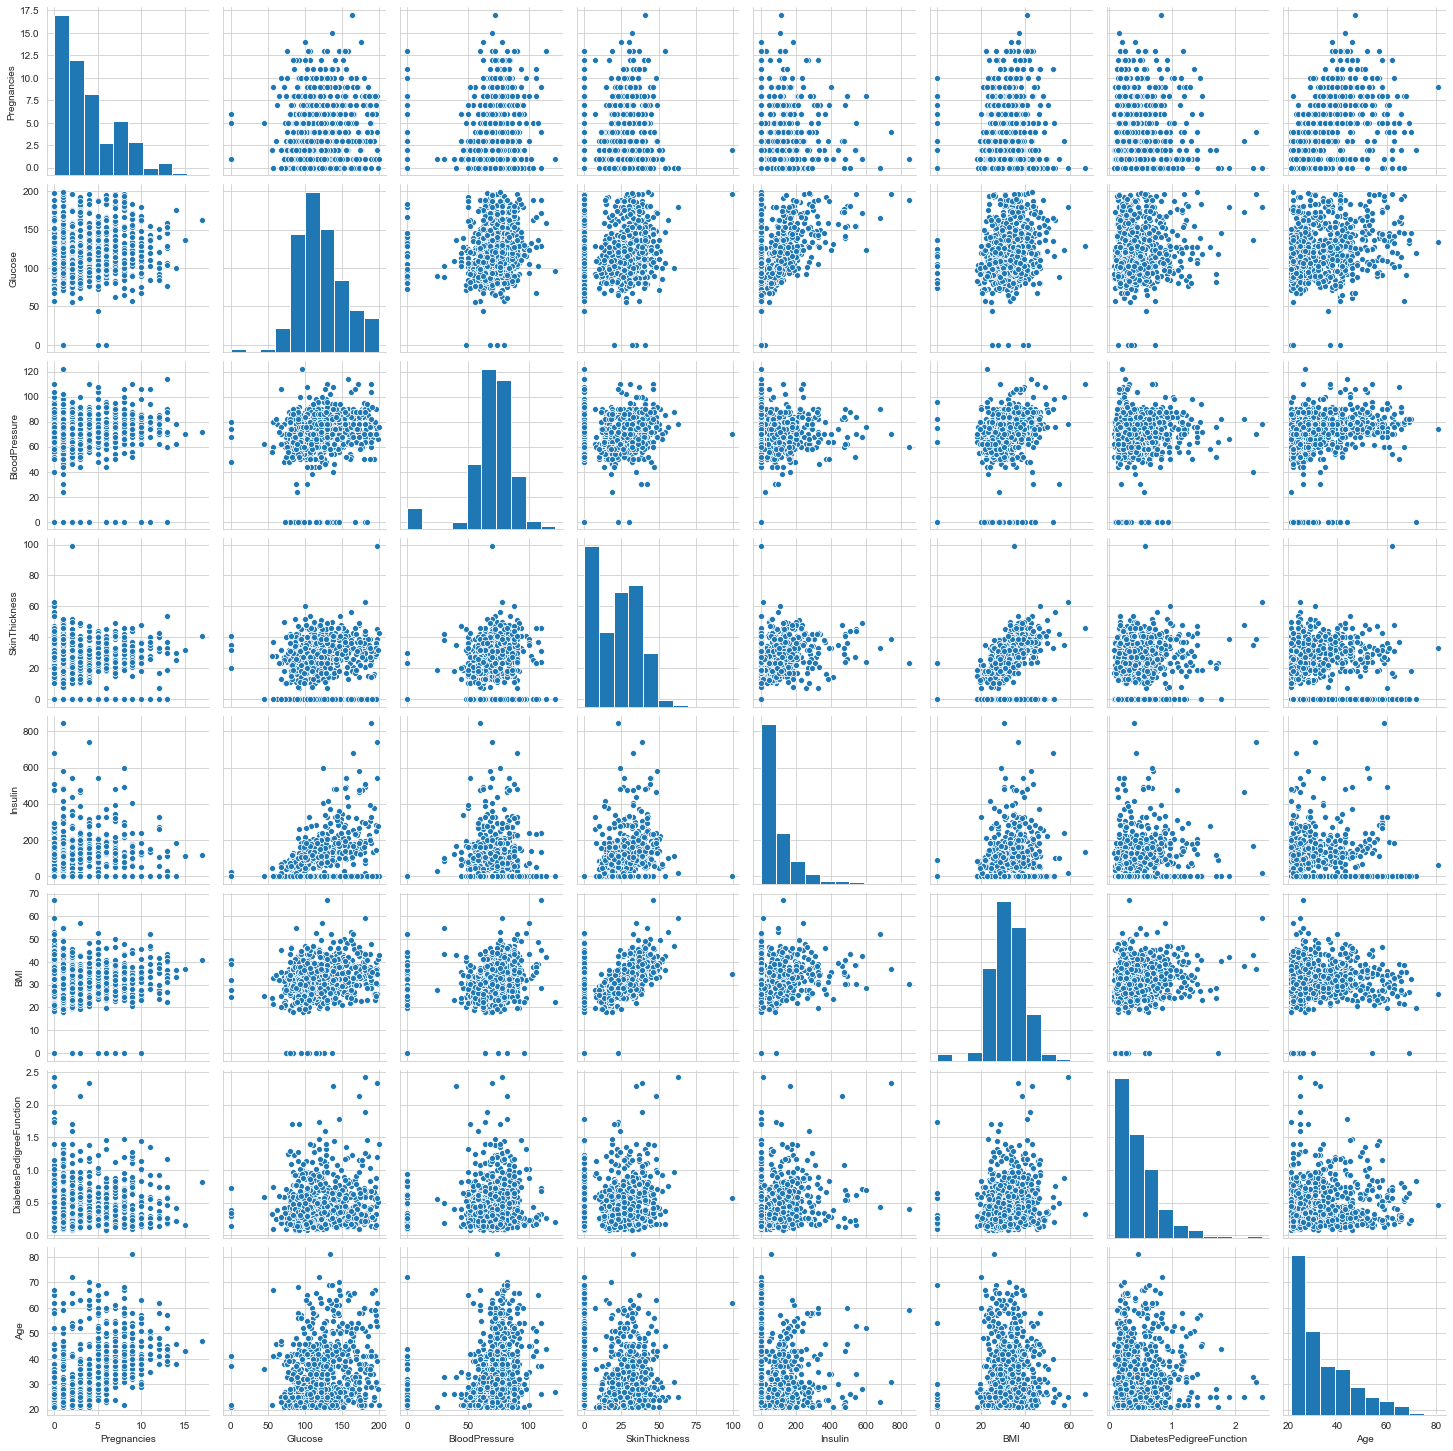

In [24]:
sns.pairplot(df.drop("Outcome", axis=1))
#a lot of the graphs are normally distributed - 
#as would be expected for measurements regarding humans variation

# NN Models

## Base model (basic Sequential) #1/4

In [15]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#1/3 of set due to low amount of records

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [72]:
df.shape

(768, 9)

In [73]:
model = Sequential()

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
early_stop = EarlyStopping(monitor="val_loss", patience=8)

In [76]:
model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
         epochs=400, callbacks=[early_stop])

Epoch 1/400
17/17 [==============================] - 0s 5ms/step - loss: 0.7665 - val_loss: 0.7177
Epoch 2/400
17/17 [==============================] - 0s 2ms/step - loss: 0.7306 - val_loss: 0.6911
Epoch 3/400
17/17 [==============================] - 0s 2ms/step - loss: 0.7090 - val_loss: 0.6809
Epoch 4/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6912 - val_loss: 0.6784
Epoch 5/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6872 - val_loss: 0.6762
Epoch 6/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6835 - val_loss: 0.6749
Epoch 7/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6790 - val_loss: 0.6750
Epoch 8/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6739 - val_loss: 0.6750
Epoch 9/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6664 - val_loss: 0.6733
Epoch 10/400
17/17 [==============================] - 0s 2ms/step - loss: 0.6649 - val_loss: 0.6718
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.5855 - val_loss: 0.5763
Epoch 84/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5752 - val_loss: 0.5699
Epoch 85/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5619 - val_loss: 0.5637
Epoch 86/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5798 - val_loss: 0.5862
Epoch 87/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5824 - val_loss: 0.5822
Epoch 88/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5818 - val_loss: 0.5626
Epoch 89/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5660 - val_loss: 0.5626
Epoch 90/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - val_loss: 0.5553
Epoch 91/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5716 - val_loss: 0.5615
Epoch 92/400
17/17 [==============================] - 0s 2ms/step - loss: 0.5609 - val_loss: 0.5743
Epoch 93/400


In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  81        
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  50        
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  18        
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                 

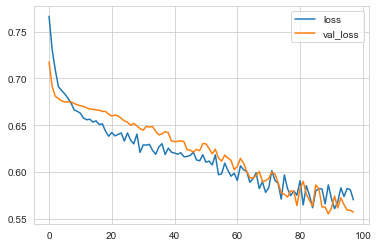

In [78]:
metrics = pd.DataFrame(model.history.history)
metrics.plot()

In [79]:
predictions = model.predict_classes(X_test_scaled)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[152   5]
 [ 68  29]]
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       157
           1       0.85      0.30      0.44        97

    accuracy                           0.71       254
   macro avg       0.77      0.63      0.62       254
weighted avg       0.75      0.71      0.67       254



## KNN model #2/4

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
error_rate = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

In [96]:
np.array(error_rate)
np.argmin(error_rate)

18

In [97]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18)

In [98]:
knn_preds = knn.predict(X_test_scaled)

In [100]:
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))
#performed slightly worse overall than the base model

[[144  13]
 [ 54  43]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       157
           1       0.77      0.44      0.56        97

    accuracy                           0.74       254
   macro avg       0.75      0.68      0.69       254
weighted avg       0.74      0.74      0.72       254



## Logistic Regression with GridSearch model #3/4

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [108]:
param_grid = {"penalty":['l1', 'l2', 'elasticnet', 'none'],
    "tol":[0.0001, 0.0005, 0.001, 0.0002],
    "C":[1.0, 0.5, 2, 0.2],
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [109]:
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, verbose=1)

In [111]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 pen

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
b:\us

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "b:\users\techn\anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.5, 2, 0.2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.0005, 0.001, 0.0002]},
             verbose=1)

In [112]:
grid.best_estimator_

LogisticRegression(penalty='none', solver='saga', tol=0.0005)

In [113]:
grid.best_params_

{'C': 1.0, 'penalty': 'none', 'solver': 'saga', 'tol': 0.0005}

In [118]:
lmgrid_preds = grid.best_estimator_.predict(X_test_scaled)

In [119]:
print(confusion_matrix(y_test, lmgrid_preds))
print(classification_report(y_test, lmgrid_preds))
#a slight improvement on the base model

[[142  15]
 [ 45  52]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       157
           1       0.78      0.54      0.63        97

    accuracy                           0.76       254
   macro avg       0.77      0.72      0.73       254
weighted avg       0.77      0.76      0.75       254



## RandomForest with GridSearch model #4/4

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_param_grid = {"n_estimators":[10,40,100,200],
    "max_depth":[None,10,20,60,80],
    "min_samples_split":[2,6,8,10,12],
    "min_samples_leaf":[1,2,4],
    "max_features":['auto','sqrt']}

In [127]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid, verbose=1)

In [128]:
rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  4.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 60, 80],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 6, 8, 10, 12],
                         'n_estimators': [10, 40, 100, 200]},
             verbose=1)

In [129]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=60, min_samples_leaf=2)

In [131]:
rf_preds = rf_grid.best_estimator_.predict(X_test_scaled)

In [132]:
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
#slightly better performance than the base model, 
#but marginally worse than the logistic model

[[138  19]
 [ 41  56]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       157
           1       0.75      0.58      0.65        97

    accuracy                           0.76       254
   macro avg       0.76      0.73      0.74       254
weighted avg       0.76      0.76      0.76       254

